***Problem 1.3** 


Before we do anything we should first import `numpy`, `pandas`, `matplotlib`, and `seaborn`. We are also going to use Justin's seaborn settings because he gave the class permission to. 



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set()

# This magic function lets us view plots inline
%matplotlib inline

# JB's favorite Seaborn settings for notebooks
rc={'lines.linewidth': 2, 'axes.labelsize': 18, 'axes.titlesize': 18,
    'axes.facecolor': 'DFDFE5'}
sns.set_context('paper', rc=rc)

# Enable bokeh inline viewing

#bokeh.io.output_notebook()

plt.close('all')

**Part a** asks us to read the data from the data file into a `DataFrame`. As per the homework policies, the csv file is contained in a subdirectory called `data`.

In [3]:
# read the csv into a dataframe
df = pd.read_csv('./data/gardner_et_al_2011_time_to_catastrophe_dic.csv', comment = '#')

**Part b** asks us if the data is tidy and then asks us to tidy the data. This data is not tidy because the columns (labeled tubulin and unlabeled tubulin) are not separate variables measured for the same observations, but rather two different sets of observations. Also, there are more data points for labeled tubulin than there are for unlabled tubulin. A way to clean up this data is to create two separate data sets. We ultilize `df.dropna()` key word argument.

In [4]:
# splice the data tables

df_labeled = df['time to catastrophe with labeled tubulin (s)']
df_unlabeled = df['time to catastrophe with unlabeled tubulin (s)']


# Drop all NaN values
df_unlabeled_clean = df['time to catastrophe with unlabeled tubulin (s)'].dropna()

**Part c** asks us to plot a histogram of the castasrophe times for labeled and unlabeled tubulin. We used `plt.hist()`. Below are several ways we could have represented our data: 

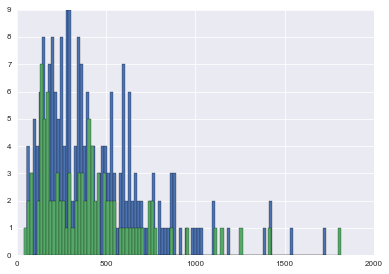

In [5]:
_ = plt.hist(df_labeled, bins = 100, normed = False)
_ = plt.hist(df_unlabeled_clean, bins = 100, normed = False)

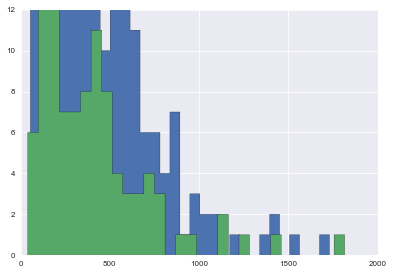

In [6]:
_ = plt.hist(df_labeled, bins = 30, normed = False, histtype = 'stepfilled')
_ = plt.hist(df_unlabeled_clean, bins = 30, normed = False, histtype = 'stepfilled')

When playing around the the number of bins we found that too many bins, as shown in the first plot, made the plot difficult to interpret. The huge number of bins was unnecessary. We can see from the second plot that the `histtype = 'stepfilled'` does not represent the data well; we prefer the default `histtype` for our graph. 

Below is our final histogram.

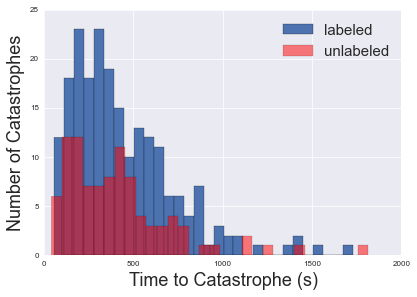

In [7]:
_ = plt.hist(df_labeled, bins = 30, normed = False)
_ = plt.hist(df_unlabeled_clean, bins = 30, normed = False, alpha = 0.5, color="red")
plt.xlabel('Time to Catastrophe (s)')
plt.ylabel('Number of Catastrophes')
plt.legend(('labeled', 'unlabeled'), loc='upper right', prop={"size":15})

To allow the viewer to see all of the data and easily compare the two data sets, we changed the transparancy of the histogram for the unlabeled data. The unlabeled histogram overlaps that of the labeled data. We did this using the `alpha` argument setting `alpha = 0.5`. We found that 30 bins represented the distribution of the data well, and we added a legend and axis labels. 

**Part d** asks us to plot the cumulative histogram for the labeled and unlabeled experiments. 

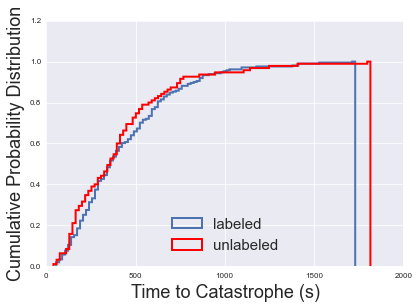

In [11]:
#plot a cumulative  histogram
_ = plt.hist(df_labeled, bins = 100, normed=1, cumulative = True, histtype = 'step', linewidth=2.0)
_ = plt.hist(df_unlabeled_clean, normed=1, bins = 100, cumulative = True, histtype = 'step', linewidth=2.0,  color = 'red')

plt.xlabel('Time to Catastrophe (s)')
plt.ylabel('Cumulative Probability Distribution')
plt.legend(('labeled', 'unlabeled'), loc='lower center', prop={"size":15})


We used the `cumulative` argument for `plt.hist()` to create this cumulative distribution plot for us. From a cumulative plot we want the sum of the data points to equal 1, with the y value of the previous data point being added to that of the current data point. In python, the `cumulative` argument for `plt.hist()` will add the previous value to the current value until it hits the last value; it does not manipulate the data so that total sum is equal to 1. This would not give us a probability distribution. In order to achieve this probability distribution, we have to set `normalized = True`. Unlike **part c** we felt that `histtype = 'step'` represented our data well. However, `histtype = 'stepfilled'` did not represent our data clearly; it was difficult to see the difference between the labeled and unlabled experiments, and the same goes for the default `histtype`. 